# 获取MNIST数据集

## 1. 导入

In [43]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/Users/andreayu/Documents/data/MNIST', one_hot=True)

Extracting /Users/andreayu/Documents/data/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/andreayu/Documents/data/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/andreayu/Documents/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/andreayu/Documents/data/MNIST/t10k-labels-idx1-ubyte.gz


In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 2. 查看基本信息

In [45]:
print('training_set shape:', mnist.train.images.shape, 'labels shape:', mnist.train.labels.shape)

training_set shape: (55000, 784) labels shape: (55000, 10)


In [46]:
print('num of training set:', mnist.train.num_examples,
      'num of validation set:', mnist.validation.num_examples,
      'num of testing set:', mnist.test.num_examples)

num of training set: 55000 num of validation set: 5000 num of testing set: 10000


## 3. 可视化 image

In [47]:
def plot_image(image):
    plt.imshow(image.reshape(28,28), cmap='binary')
    plt.show

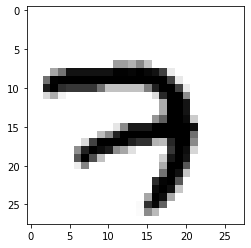

In [48]:
plot_image(mnist.train.images[0])

# 模型构建

## 1. basically

In [54]:
# 定义占位符
x = tf.placeholder(tf.float32, [None, 784], name='X')
y = tf.placeholder(tf.float32, [None, 10], name='Y')

# 定义模型变量
W = tf.Variable(tf.random_normal([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')

# 定义前向计算
forward = tf.matmul(x, W) + b
# 结果分类
pred = tf.nn.softmax(forward)

# 设置超参数
learning_rate = 0.03
total_batch = 100
train_epoch = 100
display_step = 5
batch_size = int(mnist.train.num_examples / total_batch)

# 定义损失函数
# 交叉熵
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# 定义优化选择器
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

## 2. 定义准确率

In [55]:
# 检查匹配情况
# 1是指针对的维度：0-列，1-行
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# 计算准确率
# cast将bool转化为float
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 3. 声明会话，初始化变量

In [56]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 模型训练

In [57]:
# 开始训练
for epoch in range(train_epoch):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size) # 读取批次数据
        sess.run(optimizer, feed_dict={x: xs, y: ys})
        
    # batch训练完成后使用验证数据集计算误差和准确率，验证集不分批
    loss, acc = sess.run([loss_function, accuracy], 
                         feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    
    # 打印训练过程中的详细信息
    if epoch % display_step == 0:
        print('Train Epoch: %02d' % epoch, 'Loss:', '{:.9f}'.format(loss),
             'Accuracy:', '{:.4f}'.format(acc))
        
print('Finished.')

Train Epoch: 00 Loss: 7.726243973 Accuracy: 0.1620
Train Epoch: 05 Loss: 2.517644644 Accuracy: 0.5688
Train Epoch: 10 Loss: 1.695061922 Accuracy: 0.6834
Train Epoch: 15 Loss: 1.368843794 Accuracy: 0.7344
Train Epoch: 20 Loss: 1.192585588 Accuracy: 0.7680
Train Epoch: 25 Loss: 1.079588890 Accuracy: 0.7872
Train Epoch: 30 Loss: 0.999248803 Accuracy: 0.8020
Train Epoch: 35 Loss: 0.938993156 Accuracy: 0.8122
Train Epoch: 40 Loss: 0.891772449 Accuracy: 0.8202
Train Epoch: 45 Loss: 0.852519512 Accuracy: 0.8270
Train Epoch: 50 Loss: 0.820110857 Accuracy: 0.8336
Train Epoch: 55 Loss: 0.791782320 Accuracy: 0.8392
Train Epoch: 60 Loss: 0.767461538 Accuracy: 0.8418
Train Epoch: 65 Loss: 0.745853066 Accuracy: 0.8448
Train Epoch: 70 Loss: 0.727112293 Accuracy: 0.8488
Train Epoch: 75 Loss: 0.709560156 Accuracy: 0.8508
Train Epoch: 80 Loss: 0.694199085 Accuracy: 0.8536
Train Epoch: 85 Loss: 0.679972529 Accuracy: 0.8548
Train Epoch: 90 Loss: 0.666966975 Accuracy: 0.8568
Train Epoch: 95 Loss: 0.6549096

# 模型评估

In [58]:
acc_validation = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
print('Accuracy on validation:', '{:.4f}'.format(acc_validation))
acc_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print('Accuracy on test:', '{:.4f}'.format(acc_test))

Accuracy on validation: 0.8604
Accuracy on test: 0.8603


# 模型应用与可视化

## 1. 查看预测结果

In [61]:
prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})
print(prediction_result[0:10])

[7 2 1 0 4 1 4 9 6 9]


## 2. 定义可视化函数

In [62]:
def plot_images_labels_prediction(images, # 图像列表
                                  labels, # 标签列表
                                  prediction, # 预测值列表
                                  index, # 开始显示的角标
                                  num=10): # 默认一次显示10个
    fig = plt.gcf() # 获得当前列表, get current figure
    fig.set_size_inches(10, 12)
    if num > 25:
        num = 25 # 最多显示25张
    for i in range(num):
        ax = plt.subplot(5, 5, i+1) # 当前子图位置
        ax.imshow(np.reshape(images[index], (28, 28)), cmap='binary')
        title = 'label=' + str(np.argmax(labels[index]))
        
        if len(prediction) > 0:
            title += ',prediction=' + str(prediction[index])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

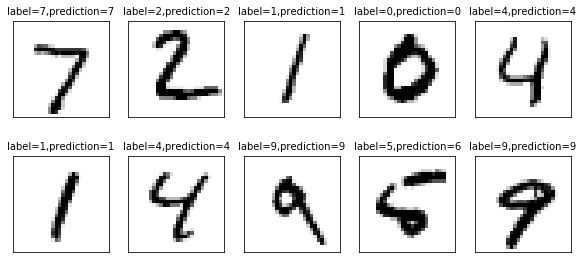

In [63]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0, 10)

In [64]:
sess.close()